In [1]:
from MEMS_serial_device import *
import numpy as np
import time
from moku.instruments import Oscilloscope
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import glob

In [54]:
port = "COM12" # black box
#port = "COM10" # mini

Vbias = 90
HardwareFilterBW = 120
VdifferenceMax = 169 # This is the maximum for the mirror in the chopping setup

In [55]:
## open a serial port
mems = MEMS_device(port=port)

## Prepare mirror settings
mems.set_mirror_params(Vbias=Vbias, HardwareFilterBW=HardwareFilterBW, VdifferenceMax=VdifferenceMax)

MTI-Device MTI-MZ-2.4.078:USB Ready in Command Mode

Setting Vbias to 90
Response: MTI-OK

Setting VdifferenceMax to 169
Response: MTI-OK

Setting HardwareFilterBW to 120
Response: MTI-OK



True

In [56]:
## Print device parameters
print(mems)
x, y = mems.get_mirror_position(verbose=True)

==------MEMS DRIVER------==
Driver is currently OFF
           Vbias = 90
  VdifferenceMax = 169
HardwareFilterBW = 120
==-----------------------==

Mirror position x = 0
Mirror position y = 0 



In [57]:
mems.HV_on()

Turning High Voltage on
Response: MTI-OK



True

In [31]:
mems.set_mirror_position(x = 0, y = 0)
mems.set_mirror_position(x = 0.02, y = -0.2)
#time.sleep(1)
#mems.set_mirror_position(x = 0, y = 0)

Going to position x =  0 , y =  0
Response: MTI-OK

Going to position x =  0.02 , y =  -0.2
Response: MTI-OK



True

In [58]:
moku_ip = '192.168.5.254'
osc = Oscilloscope(moku_ip,force_connect=True)

In [59]:
osc.set_timebase(-1e-2,1e-3)
print(osc.get_timebase())

{'t1': -0.01, 't2': 0.001}


In [92]:
## Y scan
filename = datetime.today().strftime('%y%m%d_%H%M%S')+'_y_scan'

result = []

x_val = 0.0

for y_val in np.arange(-0.2,0.204,0.004):
    y_val = round(1000*y_val)/1000.
    mems.set_mirror_position(x = x_val, y = y_val)
    #time.sleep(1)
    data = osc.get_data()
    mV_val = 1000*np.mean(data['ch4'])
    print(mV_val,'mV')
    result.append([x_val,y_val,mV_val])
    print('')

result = np.array(result)

Going to position x =  0.0 , y =  -0.2
Response: MTI-OK

-0.12270258980606741 mV

Going to position x =  0.0 , y =  -0.196
Response: MTI-OK

-0.19319131160955294 mV

Going to position x =  0.0 , y =  -0.192
Response: MTI-OK

-0.19841269840981113 mV

Going to position x =  0.0 , y =  -0.188
Response: MTI-OK

-0.23496240601161844 mV

Going to position x =  0.0 , y =  -0.184
Response: MTI-OK

-0.2584586466127803 mV

Going to position x =  0.0 , y =  -0.18
Response: MTI-OK

-0.10703842940529285 mV

Going to position x =  0.0 , y =  -0.176
Response: MTI-OK

-0.31589390141562035 mV

Going to position x =  0.0 , y =  -0.172
Response: MTI-OK

-0.26890142021329666 mV

Going to position x =  0.0 , y =  -0.168
Response: MTI-OK

-0.167084377608262 mV

Going to position x =  0.0 , y =  -0.164
Response: MTI-OK

-0.19058061820942385 mV

Going to position x =  0.0 , y =  -0.16
Response: MTI-OK

-0.023496240601161844 mV

Going to position x =  0.0 , y =  -0.156
Response: MTI-OK

-0.15925229740787472 mV

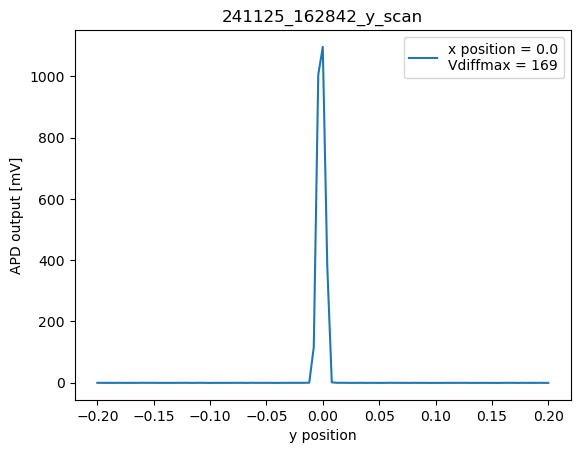

In [93]:
plt.plot(result[:,1],result[:,2],label='x position = '+str(result[0,0])+'\nVdiffmax = '+str(VdifferenceMax))
plt.xlabel('y position')
plt.ylabel('APD output [mV]')
plt.title(filename)
plt.legend()
plt.show()

In [94]:
savepath = 'C:/Users/dmqi/Desktop/MEMS'
with open(savepath+'/'+filename+'.pkl', 'wb') as f:
    pickle.dump(result, f)

In [95]:
## X scan
filename = datetime.today().strftime('%y%m%d_%H%M%S')+'_x_scan'

result = []

y_val = 0.0

for x_val in np.arange(-0.2,0.204,0.004):
    x_val = round(1000*x_val)/1000.
    mems.set_mirror_position(x = x_val, y = y_val)
    #time.sleep(1)
    data = osc.get_data()
    mV_val = 1000*np.mean(data['ch4'])
    print(mV_val,'mV')
    result.append([x_val,y_val,mV_val])
    print('')
    
result = np.array(result)

Going to position x =  -0.2 , y =  0.0
Response: MTI-OK

-0.18535923140916566 mV

Going to position x =  -0.196 , y =  0.0
Response: MTI-OK

-0.4255430242210423 mV

Going to position x =  -0.192 , y =  0.0
Response: MTI-OK

-0.24279448621200572 mV

Going to position x =  -0.188 , y =  0.0
Response: MTI-OK

-0.250626566412393 mV

Going to position x =  -0.184 , y =  0.0
Response: MTI-OK

-0.22190893901097297 mV

Going to position x =  -0.18 , y =  0.0
Response: MTI-OK

-0.044381787802194594 mV

Going to position x =  -0.176 , y =  0.0
Response: MTI-OK

-0.24540517961213482 mV

Going to position x =  -0.172 , y =  0.0
Response: MTI-OK

-0.1644736842081329 mV

Going to position x =  -0.168 , y =  0.0
Response: MTI-OK

-0.18535923140916566 mV

Going to position x =  -0.164 , y =  0.0
Response: MTI-OK

-0.23235171261148935 mV

Going to position x =  -0.16 , y =  0.0
Response: MTI-OK

-0.2584586466127803 mV

Going to position x =  -0.156 , y =  0.0
Response: MTI-OK

-0.30806182121523307 mV



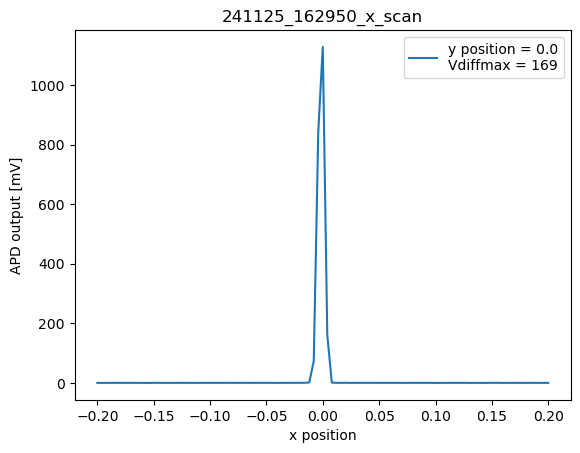

In [96]:
plt.plot(result[:,0],result[:,2],label='y position = '+str(result[0,1])+'\nVdiffmax = '+str(VdifferenceMax))
plt.xlabel('x position')
plt.ylabel('APD output [mV]')
plt.title(filename)
plt.legend()
plt.show()

In [97]:
savepath = 'C:/Users/dmqi/Desktop/MEMS'
with open(savepath+'/'+filename+'.pkl', 'wb') as f:
    pickle.dump(result, f)

In [101]:
# 0.0 , y =  0.036

res = 0.001
x_range = [-0.01,0.01]
y_range = [-0.025,0.025]

## XY scan
filename = datetime.today().strftime('%y%m%d_%H%M%S')+'_xy_scan'

result = []

for x_val in np.arange(*x_range,res):
    x_val = round(1000*x_val)/1000.

    for y_val in np.arange(*y_range,res):
        y_val = round(1000*y_val)/1000.
    
        mems.set_mirror_position(x = x_val, y = y_val)
        #time.sleep(1)
        data = osc.get_data()
        mV_val = 1000*np.mean(data['ch4'])
        print(mV_val,'mV')
        result.append([x_val,y_val,mV_val])
        print('')
    
result = np.array(result)

Going to position x =  -0.01 , y =  -0.025
Response: MTI-OK

82.2942773588693 mV

Going to position x =  -0.01 , y =  -0.024
Response: MTI-OK

-0.2088554720103275 mV

Going to position x =  -0.01 , y =  -0.023
Response: MTI-OK

-0.2845655806140712 mV

Going to position x =  -0.01 , y =  -0.022
Response: MTI-OK

-0.19319131160955294 mV

Going to position x =  -0.01 , y =  -0.021
Response: MTI-OK

-0.13836675020684197 mV

Going to position x =  -0.01 , y =  -0.02
Response: MTI-OK

-0.07048872180348553 mV

Going to position x =  -0.01 , y =  -0.019
Response: MTI-OK

-0.03654970760180731 mV

Going to position x =  -0.01 , y =  -0.018
Response: MTI-OK

-0.21668755221071478 mV

Going to position x =  -0.01 , y =  -0.017
Response: MTI-OK

-0.2114661654104566 mV

Going to position x =  -0.01 , y =  -0.016
Response: MTI-OK

-0.13575605680671288 mV

Going to position x =  -0.01 , y =  -0.015
Response: MTI-OK

-0.20363408521006932 mV

Going to position x =  -0.01 , y =  -0.014
Response: MTI-OK

-

[-0.0105 -0.0095 -0.0085 -0.0075 -0.0065 -0.0055 -0.0045 -0.0035 -0.0025
 -0.0015 -0.0005  0.0005  0.0015  0.0025  0.0035  0.0045  0.0055  0.0065
  0.0075  0.0085  0.0095] [-0.0255 -0.0245 -0.0235 -0.0225 -0.0215 -0.0205 -0.0195 -0.0185 -0.0175
 -0.0165 -0.0155 -0.0145 -0.0135 -0.0125 -0.0115 -0.0105 -0.0095 -0.0085
 -0.0075 -0.0065 -0.0055 -0.0045 -0.0035 -0.0025 -0.0015 -0.0005  0.0005
  0.0015  0.0025  0.0035  0.0045  0.0055  0.0065  0.0075  0.0085  0.0095
  0.0105  0.0115  0.0125  0.0135  0.0145  0.0155  0.0165  0.0175  0.0185
  0.0195  0.0205  0.0215  0.0225  0.0235  0.0245]
[-0.01  -0.009 -0.008 -0.007 -0.006 -0.005 -0.004 -0.003 -0.002 -0.001
  0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009]
[-0.025 -0.024 -0.023 -0.022 -0.021 -0.02  -0.019 -0.018 -0.017 -0.016
 -0.015 -0.014 -0.013 -0.012 -0.011 -0.01  -0.009 -0.008 -0.007 -0.006
 -0.005 -0.004 -0.003 -0.002 -0.001  0.     0.001  0.002  0.003  0.004
  0.005  0.006  0.007  0.008  0.009  0.01   0.011  0.012 

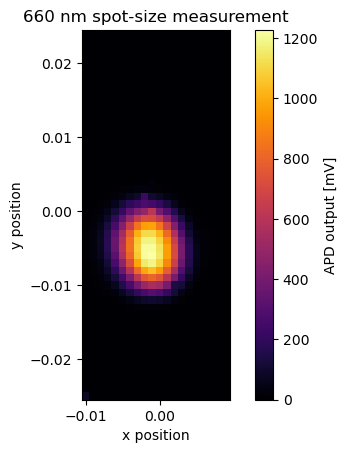

In [102]:
# Plot XY data
#x_bin_edges = np.arange(-0.02,0.033,0.001)+0.0005
#y_bin_edges = np.arange(-0.168,-0.115,0.001)-0.0005
#y_bin_edges = np.arange(-0.243,-0.19,0.001)-0.0005
x_bin_edges = np.linspace(min(result[:,0])-0.5*res,max(result[:,0])+0.5*res,len(np.unique(result[:,0]))+1)
y_bin_edges = np.linspace(min(result[:,1])-0.5*res,max(result[:,1])+0.5*res,len(np.unique(result[:,1]))+1)
print(x_bin_edges,y_bin_edges)

print(np.unique(result[:,0]))
print(np.unique(result[:,1]))

fig, ax = plt.subplots()
h = ax.hist2d(result[:,0],result[:,1],weights=result[:,2],bins=[x_bin_edges,y_bin_edges],cmap='inferno')
#h = ax.hist2d(result[:,0],result[:,1],bins=[x_bin_edges,y_bin_edges],cmap='inferno')
ax.set_aspect('equal',adjustable='box')
plt.title('660 nm spot-size measurement')
plt.xlabel('x position')
plt.ylabel('y position')
fig.colorbar(h[3], ax=ax, label='APD output [mV]')
plt.show()

In [103]:
savepath = 'C:/Users/dmqi/Desktop/MEMS'
with open(savepath+'/'+filename+'.pkl', 'wb') as f:
    pickle.dump(result, f)

In [104]:
osc.relinquish_ownership()

In [210]:
y_files = sorted(glob.glob('C:/Users/dmqi/Desktop/MEMS/*y_scan.pkl'))
y_files_660 = y_files[-3:]
print(len(y_files_660))
print(y_files_660)

3
['C:/Users/dmqi/Desktop/MEMS\\241106_114946_y_scan.pkl', 'C:/Users/dmqi/Desktop/MEMS\\241106_115114_y_scan.pkl', 'C:/Users/dmqi/Desktop/MEMS\\241106_115323_y_scan.pkl']


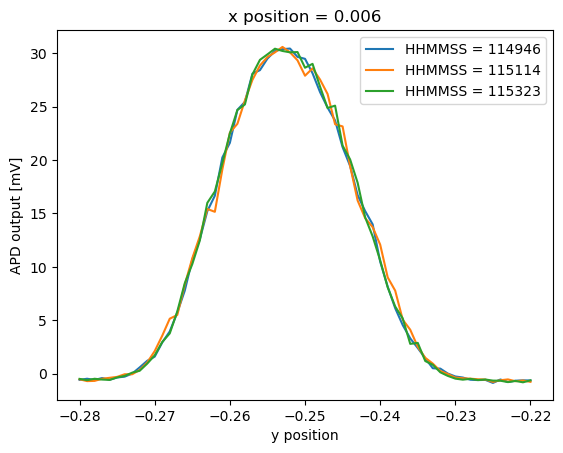

In [218]:
for fname in y_files_660:
    with open(fname, "rb") as input_file:
        result = pickle.load(input_file)

    plt.plot(result[:,1],result[:,2],label='HHMMSS = '+fname[-17:-11])

plt.xlabel('y position')
plt.ylabel('APD output [mV]')
plt.title('x position = '+str(result[0,0]))
plt.legend()
plt.show()

[-0.0195 -0.0185 -0.0175 -0.0165 -0.0155 -0.0145 -0.0135 -0.0125 -0.0115
 -0.0105 -0.0095 -0.0085 -0.0075 -0.0065 -0.0055 -0.0045 -0.0035 -0.0025
 -0.0015 -0.0005  0.0005  0.0015  0.0025  0.0035  0.0045  0.0055  0.0065
  0.0075  0.0085  0.0095  0.0105  0.0115  0.0125  0.0135  0.0145  0.0155
  0.0165  0.0175  0.0185  0.0195  0.0205  0.0215  0.0225  0.0235  0.0245
  0.0255  0.0265  0.0275  0.0285  0.0295  0.0305  0.0315  0.0325  0.0335] [-0.2605 -0.2595 -0.2585 -0.2575 -0.2565 -0.2555 -0.2545 -0.2535 -0.2525
 -0.2515 -0.2505 -0.2495 -0.2485 -0.2475 -0.2465 -0.2455 -0.2445 -0.2435
 -0.2425 -0.2415 -0.2405 -0.2395 -0.2385 -0.2375 -0.2365 -0.2355 -0.2345
 -0.2335 -0.2325 -0.2315 -0.2305 -0.2295 -0.2285 -0.2275 -0.2265 -0.2255
 -0.2245 -0.2235 -0.2225 -0.2215 -0.2205 -0.2195 -0.2185 -0.2175 -0.2165
 -0.2155 -0.2145 -0.2135 -0.2125 -0.2115 -0.2105 -0.2095]
[-0.001  0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008
  0.009  0.01   0.011]
[-0.27  -0.269 -0.268 -0.267 -0.266 -0.265 -

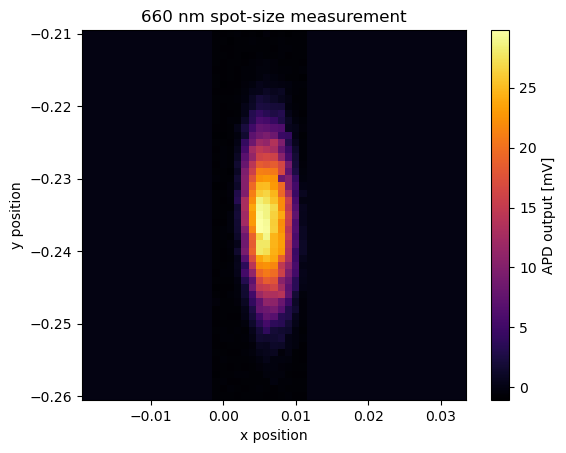

In [131]:
y_data_arrays = []
for fname in y_files_660:
    with open(fname, "rb") as input_file:
        y_data_arrays.append(pickle.load(input_file))


x_bin_edges = np.arange(-0.02,0.033,0.001)+0.0005
y_bin_edges = np.arange(-0.26,-0.209,0.001)-0.0005
print(x_bin_edges,y_bin_edges)

x_plot_array = []
y_plot_array = []
w_plot_array = []

for fi in range(len(y_files_660)):
    x_plot_array.append(y_data_arrays[fi][:,0])
    y_plot_array.append(y_data_arrays[fi][:,1])
    w_plot_array.append(y_data_arrays[fi][:,2])

x_plot_array = np.hstack(x_plot_array)
y_plot_array = np.hstack(y_plot_array)
w_plot_array = np.hstack(w_plot_array)

print(np.unique(x_plot_array))
print(np.unique(y_plot_array))

fig, ax = plt.subplots()
h = ax.hist2d(x_plot_array,y_plot_array,weights=w_plot_array,bins=[x_bin_edges,y_bin_edges],cmap='inferno')
ax.set_aspect('equal',adjustable='box')
plt.title('660 nm spot-size measurement')
plt.xlabel('x position')
plt.ylabel('y position')
fig.colorbar(h[3], ax=ax, label='APD output [mV]')
plt.show()

In [355]:
files_365 = sorted(glob.glob('C:/Users/dmqi/Desktop/MEMS/241023_152*.pkl'))
print(files_365)

['C:/Users/dmqi/Desktop/MEMS\\241023_1521_y_scan.pkl', 'C:/Users/dmqi/Desktop/MEMS\\241023_1526_x_scan.pkl']


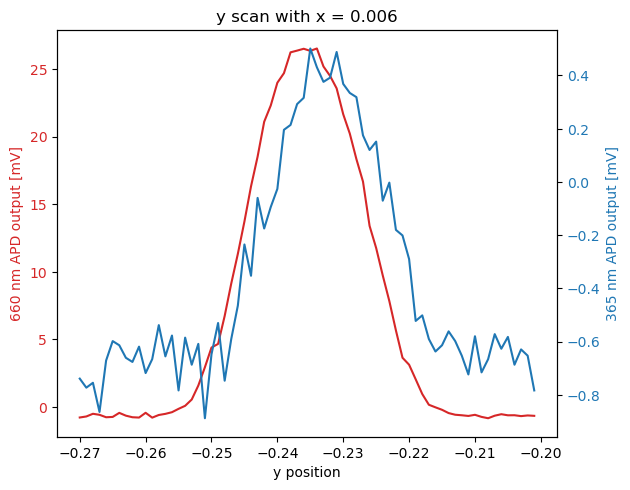

In [366]:
with open('C:/Users/dmqi/Desktop/MEMS\\241023_1521_y_scan.pkl', "rb") as input_file:
    y_data_365 = pickle.load(input_file)

with open('C:/Users/dmqi/Desktop/MEMS\\241023_1604_y_scan.pkl', "rb") as input_file:
    y_data_660 = pickle.load(input_file)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('y position')
ax1.set_ylabel('660 nm APD output [mV]',color=color)
ax1.plot(y_data_660[:,1],y_data_660[:,2],label='660 nm, x position = '+str(y_data_660[0,0]),c=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('365 nm APD output [mV]',color=color)
ax2.plot(y_data_365[:,1],y_data_365[:,2],label='365 nm, x position = '+str(y_data_365[0,0]),c=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.title('y scan with x = '+str(y_data_660[0,0]))
#plt.legend()
plt.show()

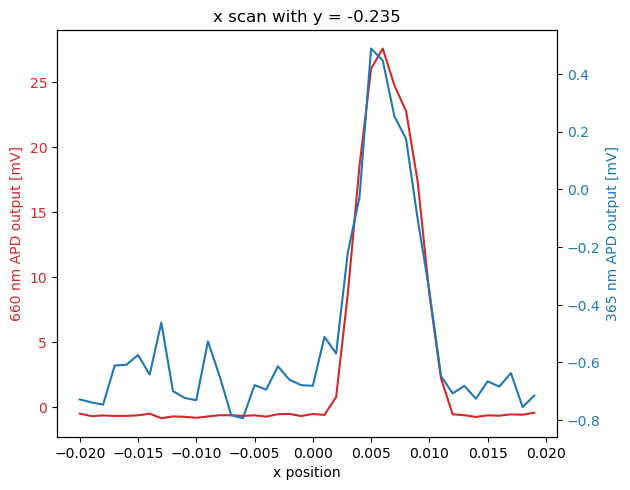

In [367]:
with open('C:/Users/dmqi/Desktop/MEMS\\241023_1526_x_scan.pkl', "rb") as input_file:
    x_data_365 = pickle.load(input_file)

with open('C:/Users/dmqi/Desktop/MEMS\\241023_1536_x_scan.pkl', "rb") as input_file:
    x_data_660 = pickle.load(input_file)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('x position')
ax1.set_ylabel('660 nm APD output [mV]',color=color)
ax1.plot(x_data_660[:,0],x_data_660[:,2],label='660 nm, y position = '+str(x_data_660[0,1]),c=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('365 nm APD output [mV]',color=color)
ax2.plot(x_data_365[:,0],x_data_365[:,2],label='365 nm, y position = '+str(x_data_365[0,1]),c=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.title('x scan with y = '+str(x_data_660[0,1]))
#plt.legend()
plt.show()

In [105]:
mems.exit_safely()

Starting Exit Sequence
Returning to position [0,0]
Turning HV off
Logging off:
MTI-Device Exit Command Mode

Disconnection successful


True

In [285]:
for y_val in np.arange(-0.27,-0.2,0.001):
    print(round(1000*y_val)/1000.)

-0.27
-0.269
-0.268
-0.267
-0.266
-0.265
-0.264
-0.263
-0.262
-0.261
-0.26
-0.259
-0.258
-0.257
-0.256
-0.255
-0.254
-0.253
-0.252
-0.251
-0.25
-0.249
-0.248
-0.247
-0.246
-0.245
-0.244
-0.243
-0.242
-0.241
-0.24
-0.239
-0.238
-0.237
-0.236
-0.235
-0.234
-0.233
-0.232
-0.231
-0.23
-0.229
-0.228
-0.227
-0.226
-0.225
-0.224
-0.223
-0.222
-0.221
-0.22
-0.219
-0.218
-0.217
-0.216
-0.215
-0.214
-0.213
-0.212
-0.211
-0.21
-0.209
-0.208
-0.207
-0.206
-0.205
-0.204
-0.203
-0.202
-0.201
